# **Baseline System- Nearest Means Classifier**

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve

# One hot encoding

In [2]:
data_train = pd.read_csv('mushroom_train.csv')
categorical_col = ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season','class']
categorical_data_train = data_train[categorical_col]
encoded_data_train = pd.get_dummies(categorical_data_train, prefix = categorical_col, prefix_sep = '_')

**Standardizing the dataset**

In [3]:
numerical_col_train = data_train.select_dtypes(include = ['float64', 'int64'])
scaler = StandardScaler()
numerical_col_scaled_train = scaler.fit_transform(numerical_col_train)
numerical_data_train = pd.DataFrame(numerical_col_scaled_train)
final_data_train = pd.concat([numerical_data_train, encoded_data_train], axis = 1)

In [4]:
df_temp = pd.DataFrame({'zeros': [0] * 42748})
df_temp.loc[final_data_train.iloc[:, -2] == 1, 'zeros'] = 0
df_temp.loc[final_data_train.iloc[:, -1] == 1, 'zeros'] = 1
final_data_train = final_data_train.drop(final_data_train.columns[-2:], axis = 1)
final_data_train = pd.concat([final_data_train, df_temp], axis = 1)
final_data_train = final_data_train.to_numpy()
X_train = final_data_train[:, :-1]
Y_train = final_data_train[:, -1]
print(X_train.shape)
print(Y_train.shape)

(42748, 92)
(42748,)


# Training phase of the system

In [5]:
clf = NearestCentroid()
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, val_scores = learning_curve(clf, X_train, Y_train, cv = 5, train_sizes = train_sizes, scoring = 'accuracy') # Cross-validation.
print(f"The training accuracy = {max(train_scores.mean(axis = 1)) * 100}%")
print(f"The validation accuracy = {max(val_scores.mean(axis = 1)) * 100}%")
clf.fit(X_train, Y_train)

The training accuracy = 63.0880202748806%
The validation accuracy = 62.65787332604135%


NearestCentroid()

# Testing phase of the system

In [6]:
# Testing dataset:
data_test = pd.read_csv('mushroom_test.csv')
categorical_data_test = data_test[categorical_col]
encoded_data_test = pd.get_dummies(categorical_data_test, prefix = categorical_col, prefix_sep = '_')
numerical_col_test = data_test.select_dtypes(include = ['float64', 'int64'])
scaler = StandardScaler()
numerical_col_scaled_test = scaler.fit_transform(numerical_col_test)
numerical_data_test = pd.DataFrame(numerical_col_scaled_test)
final_data_test = pd.concat([numerical_data_test, encoded_data_test], axis = 1)
df_temp_test = pd.DataFrame({'zeros': [0] * len(encoded_data_test)})
df_temp_test.loc[encoded_data_test.iloc[:, -2] == 1, 'zeros'] = 0
df_temp_test.loc[encoded_data_test.iloc[:, -1] == 1, 'zeros'] = 1
final_data_test = final_data_test.drop(final_data_test.columns[-2:], axis = 1)
final_data_test = pd.concat([final_data_test, df_temp_test], axis = 1)
final_data_test = final_data_test.to_numpy()

In [7]:
X_test = final_data_test[:, :-1]
Y_test = final_data_test[:, -1]
Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_pred, Y_test)
print(f"The testing accuracy = {accuracy * 100}%")

The testing accuracy = 62.85683095900879%


In [8]:
f1 = f1_score(Y_test, Y_pred)
print("The F1 score: ", f1)

The F1 score:  0.6737932026269114


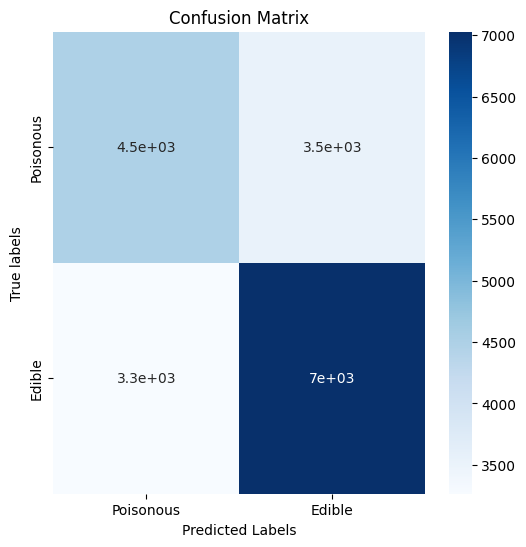

In [9]:
cm = confusion_matrix(Y_test, Y_pred)
classes = ['Poisonous', 'Edible']
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True, cmap = 'Blues', xticklabels = classes, yticklabels = classes)
plt.xlabel("Predicted Labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()